In [1]:
from preamble import *
%matplotlib inline

### 5.3. Evaluation Metrics and Scoring
- 기존의 Simple한 모델 평가 지표 (score)
  - 분류 문제: 정확도 (Accuracy)
  - 회귀 문제: $R^2$
- 하지만, 어플리케이션에 따라 위의 평가 지표가 적합하지 않을 수 있음. 

#### 5.3.1 Keep the End Goal in Mind (최종 목표를 기억하라)
- 어플리케이션의 고차원 목표인 비지니스 지표를 우선적으로 고려해야 함
  - 비지니스 지표 예
    - 교통사고율 낮춤
    - 입원환자 수 낮춤
    - 웹사이트 사용자 유입률 증대
    - 소비자 소비률 증대
  - 분석 모델 개발 초기 단계에 매개변수를 조정하기 위해 시험 삼아 모델을 실제 운영 시스템에 곧바로 적용하기란 위험부담이 크다.
- 비지니스 임팩트 (Business Impact)
  - 어떤 머신러닝 어플리케이션에서 특정 알고리즘을 선택하여 나타난 결과
- 훈련 모델에 대한 비지니스 임팩트를 정확하게 예상할 수 있는 다양한 평가지표 도입 필요
  - 이진 분류의 평가 지표
  - 다중 분류의 평가 지표
  - 회귀의 평가 지표
    
#### 5.3.2 Metrics for Binary Classification
- 두 가지 분류 클래스
  - 양성 클래스 (주 관심 클래스) --> Positive Class
  - 음성 클래스 --> Negative Class <br/><br/>
  
- 모델 적용 결과에 대한 분류
  - True Positive (참 양성, TP)
    - 모델에서 실제 양성 클래스를 정확하게 양성으로 평가한 것들
  - False Negative (거짓 음성, FN)
    - 모델에서 실제 양성 클래스를 잘못하여 음성으로 평가한 것들    
  - True Negative (참 음성, TN)
    - 모델에서 실제 음성 클래스를 정확하게 음성으로 평가한 것들          
  - False Positive (거짓 양성, FP)
    - 모델에서 실제 음성 클래스를 잘못하여 양성으로 평가한 것들 

- 참고: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative

<img src="images/eval.png" width="75%"/>

##### Kinds of errors
- 암의 조기 발견 어플리케이션 
  - 테스트가 음성(-)이면 건강함을 뜻함
    - 음성 클래스(Negative Class)
  - 테스트가 양성(+)이면 암 진단이 되었음을 뜻함
    - 양성 클래스(Positive Class)
  - 잘못된 분류 케이스
    - Case 1. 건강한 사람을 양성으로 잘못 분류한 경우
      - 이 환자에게 비용 손실과 불편함을 초래함
      - 즉, 잘못된 양성 예측
      - 분류: ***거짓 양성 (False Positive)***
    - Case 2. 암에 걸린 사람을 음성으로 잘못 분류한 경우
      - 제대로 된 검사나 치료를 제때에 못하게 하는 치명적인 오류
      - 즉, 잘못된 음성 예측
      - 분류: ***거짓 음성 (False Negative)***
      
- 대부분의 경우 ***거짓 음성***이 ***거짓 양성***보다 더 치명적
- 거짓 음성 분류와 거짓 양성 분류 중 하나가 다른 것 보다 훨씬 많을 때 이 상황은 매우 중요한 상황으로 인식해야 함.
##### Imbalanced datasets
- 불균형 데이터셋(Imbalanced datasets)
  - 예) 인터넷 광고 클릭 데이터에서 원본 데이터 샘플의 99%가 '클릭 아님'이고 1%만이 '클릭'인 데이터셋
  - 현실에서 불균형 데이터는 매우 많음
  - 위 예에서 머신러닝 모델을 만들지 않고서도 무조건 '클릭 아님'으로 예측하면 그 정확도가 99%가 됨.
  
- 따라서, '정확도'만으로 모델의 성능을 판별하는 것은 지양해야 함.

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test[:10])
print()
print(len(np.where(y_test == True)[0]))
print(len(np.where(y_test == False)[0]))

(1347, 64)
(1347,)
(450, 64)
(450,)
[False False False False False False False  True False False]

47
403


- DummyClassifier
  - strategy='stratified'
    - 기본값
    - 레이블 비율에 맞추어서 예측
  - strategy='most_frequent'    
    - 가장 많은 레이블로 항상 예측

- DummyRegressor
  - strategy='mean'
  - strategy='median'  

In [4]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [6]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_dummy)))
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

Unique predicted labels: [False  True]
dummy score: 0.84
logreg score: 0.98


##### Confusion matrices
- **오차 행렬(Confusion Matrix)**
  - 이진 분류 평가 결과를 나타낼 때 가장 널리 사용되는 방식
  - 행(Row)
    - 정답 클래스
  - 열(Colume)
    - 예측 클래스

In [7]:
from sklearn.metrics import confusion_matrix

print(len(np.where(y_test == True)[0]))
print(len(np.where(y_test == False)[0]))

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

47
403
Confusion matrix:
[[401   2]
 [  8  39]]


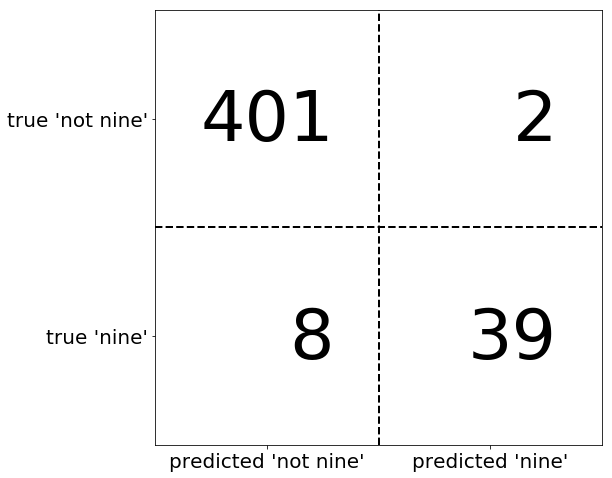

In [8]:
mglearn.plots.plot_confusion_matrix_illustration()

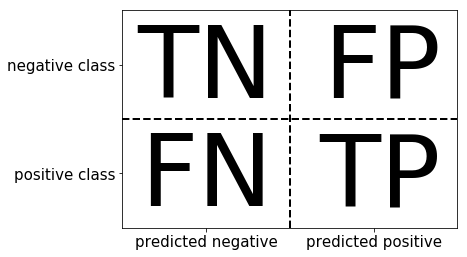

In [9]:
mglearn.plots.plot_binary_confusion_matrix()

In [10]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))

print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))

print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[356  47]
 [ 43   4]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


###### Accuracy (정확도)
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

- 전체 샘플 수 중에서 정확히 예측한 것(TP 와 TN)의 비율
- scikit-learn 에서 score 함수가 반환하는 값

##### Precision (정밀도)
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

- 양성(Positive)로 예측한 것(TP와 FP)들 중 진짜 양성인 것(TP)의 비율
- **거짓 양성(FP)의 수를 줄이는 것을 목표**로 할 때 사용하는 지표
  - 신약의 효과 검증 등 임상 시험에 많이 사용
- **거짓 음성(FN)의 수가 늘어나는 것에 대해 정밀도 수치는 영향받지 않음**
- 양성 예측도 (PPV)라고도 불리움

##### Recall (재현율)
\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

- 진짜 양성인 것(FN과 TP)들 중 올바르게 양성으로 예측된 것(TP)의 비율 
- **거짓 음성(FN)의 수를 줄이는 것**을 목표로 할 때 사용하는 지표
  - 암 진단
- **거짓 양성(FP)의 수가 늘어나는 것에 대해 재현율 수치는 영향받지 않음***
  - 즉, 건강한 사람이 일부 암 진단을 받더라도 암에 걸린 사람을 빠짐없이 찾는 것이 더 중요
- 민감도(Sensitivity), 적중률(Hit Rate), 진짜 양성 비율 (TPR)라고도 불리움

##### f-score (f-점수)
- $P$: Precision
- $R$: Recall
\begin{equation}
\text{F} = \frac{1}{\displaystyle \alpha \frac{1}{P} + (1-\alpha) \frac{1}{R}}
\end{equation}
- 정밀도와 재현율은 상충 관계
- 모든 샘플을 양성 클래스로만 예측한 경우
  - FP와 TP만 존재
  - 재현율: 1, 정밀도는 상대적으로 낮아짐
- 하나의 샘플만 (올바르게) 양성 클래스로 예측하고 나머지 샘플을 음성 클래스로만 예측한 경우
  - TN과 FN만 존재
  - 정밀도: 1, 재현율은 상대적으로 낮아짐
- f-score
  - 정밀도와 재현율의 조화 평균
  - 정밀도와 재현울을 동시에 고려한 수치이므로 불균한 이진 분류문제의 정확도(Accuracy)보다 더 나은 지표 
  - f1-score
    - f-score 공식에서 $\alpha=0.5$
\begin{equation}
\text{f1-score} = \frac{1}{\displaystyle 0.5 \frac{1}{P} + 0.5 \frac{1}{R}} = 2 \cdot \frac{P \cdot R}{P + R}
\end{equation}
- f-measure (f-측정)이라고도 함

#### [Note] 주가 변동 이진 분류 예측
- 특성 데이터
  - 일봉의 종가 기반
  - N개 종목의 과거 M일치의 종가 데이터
  - 1개 샘플의 특성 데이터 크기 N * M
  - 하루씩 Shift하면서 새로운 샘플 생성
- 타겟 데이터
  - 특정 종목의 M+1일의 종가 데이터
  - 직전 M일자 종가보다 M+1일자 종가가 올랐다면 1, 그렇지 않으면 0
- 두 가지 분류 클래스
  - 1: 양성 (Positive) 클래스
  - 0: 음성 (Negative) 클래스 
- 성능 평가 측정
  - Accuracy는 당연히 높아야 함.
  - Precision과 Recall은 상충관계이므로 둘 중 하나를 택하여 더 집중적으로 높여야 한다면 어떤것을 높여야 하나?
    - Precision 관점
      - 거짓 양성(FP)을 줄이는 것을 목적
      - 즉, 주가가 올라간다고 예측을 했는 데, 실제로는 하락을 한 경우를 줄이고자 함.
      - **재화의 상실**
    - Recall 관점
      - 거짓 음성(FN)을 줄이는 것을 목적
      - 즉, 주가가 하락한다고 예측을 했는 데, 실제로는 상승을 한 경우를 줄이고자 함.
      - **기회의 상실**

In [11]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.08
f1 score tree: 0.55
f1 score logistic regression: 0.89


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- sklearn.metrics.classification_report
  - 각 클래스마다 교대로 양성임을 가정
  - 상위 두 개의 출력 라인
    - 해당 클래스가 양성일 때 다음 4개의 값을 출력
      - 정밀도(precision)
      - 재현율(recall)
      - f1-점수(f1-score)
      - 해당 클래스에 실제로 속한 샘플 개수(support) 
          - 정답 데이터인 y_test에 대한 각 클래스별 샘플 개수

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.89      0.88      0.89       403
       nine       0.08      0.09      0.08        47

avg / total       0.81      0.80      0.80       450



In [14]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



##### Taking uncertainty into account
- 모델 예측의 확신도를 가늠하기 위한 함수
  - decicion_function
    - 임계값: 0
    - decision_fuction의 임계값이 0일 때 클래스 분류  
      - decision_function() <= 0 --> 클래스 0 (음성 클래스)로 분류
      - decision_function() > 0 --> 클래스 1 (양성 클래스)로 분류
  - predict_proba
    - 임계값: 0.5

In [17]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(
    n_samples=(400, 50),  # 음성 클래스: 400개, 양성 클래스: 50개
    centers=2, 
    cluster_std=[7.0, 2], 
    random_state=22
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

svc = SVC(gamma=.05).fit(X_train, y_train)

(337, 2)
(337,)

(113, 2)
(113,)


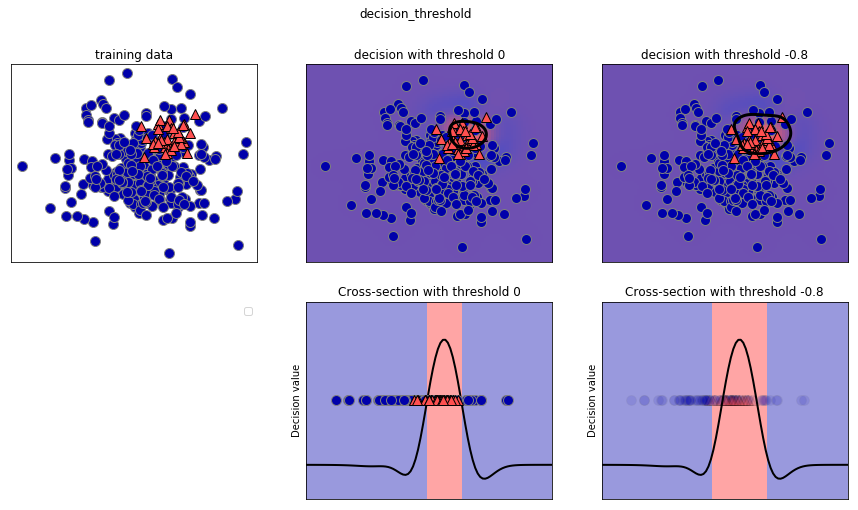

In [16]:
mglearn.plots.plot_decision_threshold()

In [18]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



- 이제 클래스 1의 재현율(recall)을 높이는 것이 중요하다고 가정.
  - 즉, 거짓 양성(FP)의 수가 늘어나도 중요하지 않음.
  - 진짜 양성(TP)을 늘리고 거짓 음성(FN)을 줄이려고 함.
  - decision_function의 임계값을 낮추면 클래스 1로 분류되는 경우가 더 많아짐

In [19]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(y_pred_lower_threshold.shape)

(113,)


In [20]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113

